In [1]:
# import numpy as np
# from sklearn.datasets import make_circles
# import matplotlib.pyplot as plt
# from sklearn.datasets import load_breast_cancer
# from sklearn.preprocessing import StandardScaler
# from statistics import mode
# from sklearn.metrics import ConfusionMatrixDisplay
# from PIL import Image
# from time import time
# import pandas as pd
# from tqdm import tqdm
# from sklearn.cluster import SpectralClustering
# from sklearn.ensemble import RandomForestClassifier
%run kmeans

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


# kmeans
https://towardsdatascience.com/k-means-clustering-from-a-to-z-f6242a314e9a

In [39]:
# import numpy as np
# from tqdm import tqdm


# def kmeans(X:np.ndarray, k:int, centroids=None, max_iter=30, tolerance=1e-2,verbose = False):
#     # convert to float32 so that norm calclulation can canverage
#     X = np.float64(X)
#     if centroids == 'kmeans++':
#         # centroids is k*p matrix where k is # centroids, p is dimensions
#         # i.e: [[86.94],[80.65],[92.86]]
#         print('!!!!activate kmeans++!!!!')
#         m = select_centroids(X,k)

        
#     else:
#         # random choose k unique centriods
#         m = X[np.random.choice(X.shape[0], k, replace=False), :]
#     if verbose ==1:
#         print('init cnetroid:')
#         print(m)
    
#     m_new = m.copy()

#     # count iter
#     t = 0
    
#     for _ in tqdm(range(max_iter)):
#         if verbose ==1:
#             print(f'inter: {t+1}')
#             print('previous_centriod:')
#             print(m)

#         cluster = [[] for _ in range(k)]
#         cluster_new = cluster.copy()
#         label = []

#         for point in X:
#             # j* is individual label
#             j_star = np.argmin([np.linalg.norm(point-cen) for cen in m])
#             label.append(j_star)
#             cluster[j_star].append(point)
        
#         # check if any cluster is empty
#         for c in cluster:
#             if len(c)==0:
#                 c.append(X[np.random.choice(X.shape[0]), :])
        
#         # update m_new
#         for index, _ in enumerate(m_new):
#             # avg of data feature wise
#             m_new[index] = np.mean(cluster[index],axis=0)
#         if verbose ==1:
#             print('new_centriod:')
#             print(m_new)
        
#         for index, point in enumerate(X):
#             j_star = np.argmin([np.linalg.norm(point-cen) for cen in m_new])
#             label[index] = j_star
#             cluster_new[j_star].append(point)
            
#         # compute avg_norm_cen
#         avg_norm_cen = np.mean(np.linalg.norm(m-m_new,axis=1))
#         if verbose ==1:
#             #print('new_cluster: ',cluster_new)
#             print("=="*30)
#             #print(m,'vs\n',m_new)
#             print('average norm of centroids-previous_centroids:', avg_norm_cen)
#             print("=="*30)

#         t+=1

#         if avg_norm_cen < tolerance or t>=max_iter:
#             print('final norm: ', avg_norm_cen)
#             if verbose ==1:
#                 print('final cetriod: ')
#                 print(m_new)
#                 #print('label: ',np.array(label))
            
#             return m_new, np.array(label)
#         m = m_new.copy()

## speed up 

In [29]:
def kmeans(X: np.ndarray, k: int, centroids=None, max_iter=30, tolerance=1e-2, verbose=False):
    # convert to float32 so that norm calclulation can canverage
    X = np.float64(X)
    if centroids == 'kmeans++':
        # centroids is k*p matrix where k is # centroids, p is dimensions
        # i.e: [[86.94],[80.65],[92.86]]
        print('!!!!activate kmeans++!!!!')
        m = select_centroids(X, k)

    else:
        # random choose k unique centriods
        m = X[np.random.choice(X.shape[0], k, replace=False), :]
    if verbose == 1:
        print('init cnetroid:')
        print(m)

    m_new = m.copy()

    # count iter
    t = 0

    for _ in tqdm(range(max_iter)):
        # if verbose == 1:
        #     print(f'inter: {t+1}')
        #     print('previous_centriod:')
        #     print(m)

        cluster = [[] for _ in range(k)]
        cluster_new = cluster.copy()

        j_star = []
        for cen in m:
            # j* is individual label
            j_star.append(np.linalg.norm(X-cen, axis=1))
            label = np.argmin(np.array(j_star).T, axis=1)

        # assign x to cluster
        for i in range(k):
            cluster[i].append(X[np.where(label == i)])

        # check if any cluster is empty
        for c in cluster:
            if len(c[0]) == 0:
                #print(c[0])
                np.append(c[0],X[np.random.choice(X.shape[0]), :])
                #c[0].append(X[np.random.choice(X.shape[0]), :])

        # update m_new
        for index, _ in enumerate(m_new):
            # avg of data feature wise
            m_new[index] = np.mean(cluster[index][0], axis=0)
        # if verbose == 1:
        #     print('new_centriod:')
        #     print(m_new)

        j_star = []
        for cen in m_new:
            # j* is individual label
            j_star.append(np.linalg.norm(X-cen, axis=1))
            # print(j_star)
            label = np.argmin(np.array(j_star).T, axis=1)
        # assign x to cluster
        for i in range(k):
            cluster_new[i].append(X[np.where(label == i)])

        # compute avg_norm_cen
        avg_norm_cen = np.mean(np.linalg.norm(m-m_new, axis=1))
        # if verbose == 1:
        #     #print('new_cluster: ',cluster_new)
        #     print("=="*30)
        #     # print(m,'vs\n',m_new)
        #     print('average norm of centroids-previous_centroids:', avg_norm_cen)
        #     print("=="*30)

        t += 1

        if avg_norm_cen < tolerance or t >= max_iter:
            if verbose == 1:
                print('final norm: ', avg_norm_cen)
                print('final cetriod: ')
                print(m_new)
                #print('label: ',np.array(label))

            return m_new, np.array(label)
        m = m_new.copy()

In [142]:
cluster = [[] for _ in range(3)]
x = np.array([[92.65],
       [93.87],
       [74.06],
        [92.94]])
m = np.array([[91.79],
       [95.23],
       [85.37]])
for i in x:
    for ii in m:
        print(np.linalg.norm(i-ii))
    print()

0.8599999999999994
2.5799999999999983
7.280000000000001

2.0799999999999983
1.3599999999999994
8.5

17.730000000000004
21.17
11.310000000000002

1.1499999999999915
2.2900000000000063
7.569999999999993



In [143]:
j =[]
for i in m:
    j.append(np.linalg.norm(i-x,axis=1))
j = np.argmin(np.array(j).T,axis = 1)
j

array([0, 1, 2, 0])

In [144]:
for i in range(3):
    cluster[i].append(x[np.where(j==i)])

In [149]:
cluster

[[array([[92.65],
         [92.94]])],
 [array([[93.87]])],
 [array([[74.06]])]]

In [153]:
for c in cluster:
    print(len(c[0]))

2
1
1


# kmeans++
reference: https://www.geeksforgeeks.org/ml-k-means-algorithm/

In [40]:
# def select_centroids(X,k):
#     """
#     kmeans++ algorithm to select initial points:

#     1. Pick first point randomly
#     2. Pick next k-1 points by selecting points that maximize the minimum
#        distance to all existing clusters. So for each point, compute distance
#        to each cluster and find that minimum.  Among the min distances to a cluster
#        for each point, find the max distance. The associated point is the new centroid.

#     Return centroids as k x p array of points from X.
#     """
#     centroids = []
#     # pick 1st center randomly
#     m1 = X[np.random.choice(X.shape[0], replace=False), :]
    
#     centroids.append(m1)
#     # remove used point
#     del_X = np.delete(X,np.where(X==m1),axis=0)
#     # compute remaining k - 1 centroids
#     for c_id in range(k-1):
#         distances  = []
#         for point in del_X:
#             for c in centroids:
#                 # compute distance of 'point' from each of the previously
#                 # selected centroid and store the minimum distance
#                 dist = np.linalg.norm(c-point)
#             distances.append(dist)

#         # select data point with maximum distance as our next centroid
#         next_centroid = del_X[np.argmax(distances),:]

#         centroids.append(next_centroid)
#         # remove used point
#         del_X= np.delete(del_X,np.where(del_X == next_centroid),axis = 0)
#     return np.array(centroids).reshape(k,X.shape[1])

## speed up 

In [30]:
def select_centroids(X,k):
    """
    kmeans++ algorithm to select initial points:

    1. Pick first point randomly
    2. Pick next k-1 points by selecting points that maximize the minimum
       distance to all existing clusters. So for each point, compute distance
       to each cluster and find that minimum.  Among the min distances to a cluster
       for each point, find the max distance. The associated point is the new centroid.

    Return centroids as k x p array of points from X.
    """
    centroids = []
    # pick 1st center randomly
    m1 = X[np.random.choice(X.shape[0], replace=False), :]
    
    centroids.append(m1)
    # remove used point
    del_X = np.delete(X,np.where(X==m1),axis=0)
    # compute remaining k - 1 centroids
    for c_id in range(k-1):
        # compute distance of 'point' from each of the previously
        # selected centroid (del_X row wise) and store the minimum distance
        # axis = 1 perform on every row of del_X
        max_dist_id = np.argmax(np.linalg.norm(del_X-centroids[c_id],axis=1))
        next_centroid = del_X[max_dist_id,:]
        centroids.append(next_centroid)

        # remove used point
        del_X= np.delete(del_X,np.where(del_X == next_centroid),axis = 0)
    return np.array(centroids).reshape(k,X.shape[1])

In [53]:
x = np.array([[92.65],
       [93.87],
       [74.06],
        [92.94]])
print(x.shape)
cen = np.array([[91.79],
       [95.23],
       [85.37]])
for c_id in range(2):
    print(np.linalg.norm(x-cen[c_id],axis=1))
    print(np.argmax(np.linalg.norm(x-cen[c_id],axis=1)))

(4, 1)
[ 0.86  2.08 17.73  1.15]
2
[ 2.58  1.36 21.17  2.29]
2


## compare out put difference

In [31]:
# for i in range(10):
#     print(f'{select_centroids(X,3)}\n{select_centroids2(X,3)}\n===========')

# synthetic data

In [30]:
grades = [92.65,93.87,74.06,86.94,92.26,94.46,92.94,80.65,92.86,85.94,91.79,95.23,85.37,87.85,87.71,93.03]
grades = np.array(grades).reshape(-1,1)
k = 3
X = grades
max_iter=30
tolerance=1e-2
centroids = None
print(grades.shape)

(16, 1)


In [31]:
X[:,:]

array([[92.65],
       [93.87],
       [74.06],
       [86.94],
       [92.26],
       [94.46],
       [92.94],
       [80.65],
       [92.86],
       [85.94],
       [91.79],
       [95.23],
       [85.37],
       [87.85],
       [87.71],
       [93.03]])

In [32]:
centriods, labels = kmeans(grades,k, centroids='kmeans++')#,verbose=True)
print(centriods.reshape(1,-1))
print(labels)
for j in range(k):
    print(grades[np.array(labels) ==j].reshape(1,-1))

!!!!activate kmeans++!!!!


 10%|██▊                         | 3/30 [00:00<00:00, 730.63it/s]

[[86.762      77.355      93.23222222]]
[2 2 1 0 2 2 2 1 2 0 2 2 0 0 0 2]
[[86.94 85.94 85.37 87.85 87.71]]
[[74.06 80.65]]
[[92.65 93.87 92.26 94.46 92.94 92.86 91.79 95.23 93.03]]


## compare performance with/wo kmeas++

In [33]:
print('*'*15+'randomly init k centers without kmeans++'+'*'*15)
centriods, labels = kmeans(grades,k,verbose=True)#, centroids='keams++')
print(centriods.reshape(1,-1))
print(labels)
for j in range(k):
    print(grades[np.array(labels) ==j].reshape(1,-1))
    
print('*'*15+'kmeans++ init k center'+'*'*15)
centriods, labels = kmeans(grades,k, centroids='kmeans++',verbose=True)
print(centriods.reshape(1,-1))
print(labels)
for j in range(k):
    print(grades[np.array(labels) ==j].reshape(1,-1))

***************randomly init k centers without kmeans++***************
init cnetroid:
[[87.85]
 [85.37]
 [92.86]]


  7%|█▊                          | 2/30 [00:00<00:00, 613.34it/s]


final norm:  0.0
final cetriod: 
[[86.762     ]
 [77.355     ]
 [93.23222222]]
[[86.762      77.355      93.23222222]]
[2 2 1 0 2 2 2 1 2 0 2 2 0 0 0 2]
[[86.94 85.94 85.37 87.85 87.71]]
[[74.06 80.65]]
[[92.65 93.87 92.26 94.46 92.94 92.86 91.79 95.23 93.03]]
***************kmeans++ init k center***************
!!!!activate kmeans++!!!!
init cnetroid:
[[92.65]
 [74.06]
 [95.23]]


 10%|██▋                        | 3/30 [00:00<00:00, 1499.04it/s]

final norm:  0.0
final cetriod: 
[[86.762     ]
 [77.355     ]
 [93.23222222]]
[[86.762      77.355      93.23222222]]
[2 2 1 0 2 2 2 1 2 0 2 2 0 0 0 2]
[[86.94 85.94 85.37 87.85 87.71]]
[[74.06 80.65]]
[[92.65 93.87 92.26 94.46 92.94 92.86 91.79 95.23 93.03]]


In [10]:
np.unique(labels)

array([0, 1, 2])

# p = 2 circle data

(500, 2)


 27%|███████▏                   | 8/30 [00:00<00:00, 1073.57it/s]

[[-0.00849943 -0.46642689]
 [ 0.01158384  0.33604786]]


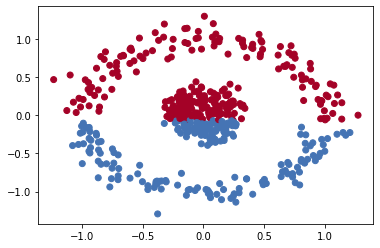

In [34]:
X, _ = make_circles(n_samples=500, noise=0.1, factor=.2)
print(X.shape)
centroids, labels = kmeans(X, 2)#,verbose=True,centroids='kmeans++')
print(centroids)
colors=np.array(['#4574B4','#A40227'])
plt.scatter(X[:,0], X[:,1], c=colors[labels])
plt.show();

!!!!activate kmeans++!!!!


 17%|████▋                       | 5/30 [00:00<00:00, 825.07it/s]

[[ 0.2089763   0.07649723]
 [-0.64568175 -0.22032282]]


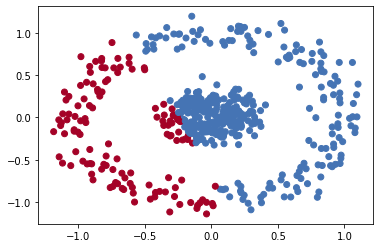

In [35]:
X, _ = make_circles(n_samples=500, noise=0.1, factor=.2)
centroids, labels = kmeans(X, 2, centroids='kmeans++')#,verbose=True)
print(centroids)
colors=np.array(['#4574B4','#A40227'])
plt.scatter(X[:,0], X[:,1], c=colors[labels])
plt.show();

In [23]:
np.unique(labels)

array([0, 1])

# breast_cancer

In [15]:
# def likely_confusion_matrix(y,labels):
#     if labels.sum()/y.sum()<.6:
#         # flip the label of predicted labels
#         labels= 1- labels
    
#     ConfusionMatrixDisplay.from_predictions(y, labels);
#     print(f'clustering accur: {(labels==y).mean()}')

In [24]:
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
sc = StandardScaler()
X = sc.fit_transform(X)
k = 2
X.shape

(569, 30)

 17%|████▋                       | 5/30 [00:00<00:00, 662.67it/s]

final norm:  0.0
(194, 30) (375, 30)
375 357
clustering accur: 0.9050966608084359


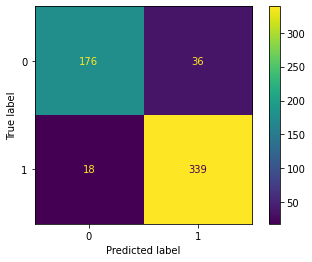

In [32]:
centroids, labels = kmeans(X,k,tolerance=0.01)#,centroids='kmeans++')
clusters= []
for j in range(k):
    clusters.append(X[np.array(labels) ==j])
print(clusters[0].shape,clusters[1].shape)
print(labels.sum(),y.sum())
likely_confusion_matrix(y,labels)

!!!!activate kmeans++!!!!


 33%|█████████                  | 10/30 [00:00<00:00, 712.61it/s]

final norm:  0.0
(381, 30) (188, 30)
188 357
clustering accur: 0.9121265377855887


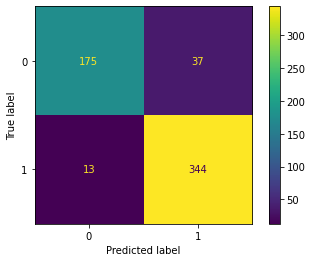

In [33]:
centroids, labels = kmeans(X,k,tolerance=0.01,centroids='kmeans++')#,verbose=True)
clusters= []
for j in range(k):
    clusters.append(X[np.array(labels) ==j])
print(clusters[0].shape,clusters[1].shape)
print(labels.sum(),y.sum())
likely_confusion_matrix(y,labels)

In [34]:
np.unique(labels)

array([0, 1])

> below indicates cluster labels are the opposite as y label. 
1 should be 0 and 1 should be 0

In [35]:
labels.sum(),y.sum()

(188, 357)

# Application to image compression
https://www.geeksforgeeks.org/image-segmentation-using-k-means-clustering/
## Greyscale

In [14]:
img= Image.open('../msds689/projects/kmeans/small_grey.png')
X =np.array(img)
h,w= X.shape

Image.fromarray(X)

print(X.shape)

X = X.reshape(-1,1)
X.shape

(45, 39)


(1755, 1)

In [15]:
k=4
centroids, labels = kmeans(X, k =k, centroids='kmeans', tolerance=.01)

centroids = centroids.astype(np.uint8)

X = centroids[labels] # reassign all points
#print(X)
img_ = Image.fromarray(X.reshape(h,w),'L')
np.unique(labels)

 83%|██████████████████████▌    | 25/30 [00:00<00:00, 984.25it/s]

final norm:  0.0


array([0, 1, 2, 3])

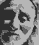

In [16]:
img_

(468, 700)


(327600, 1)

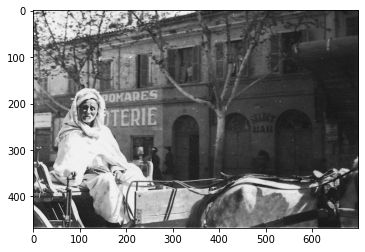

In [4]:
# full img
img= Image.open('../msds689/projects/kmeans/north-africa-1940s-grey.png')
X =np.array(img)
h,w= X.shape
plt.imshow(Image.fromarray(X),cmap='gray')

print(X.shape)

X = X.reshape(-1,1)
X.shape

!!!!activate kmeans++!!!!
init centroids:
[[ 39.]
 [219.]
 [  0.]
 [217.]]


 47%|█████████████               | 14/30 [00:00<00:00, 29.75it/s]

final norm:  0.0
final centroids: 
[[ 76.86063093]
 [186.27900895]
 [ 39.39945392]
 [125.80419976]]
time: 0.5146811008453369


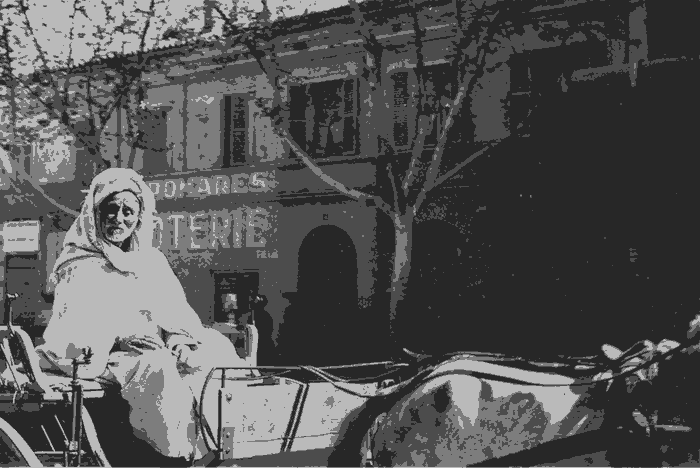

In [7]:
k=4
start = time()
centroids, labels = kmeans(X, k =k, centroids='kmeans++',tolerance=.01,verbose=True)
print(f'time: {(time()-start)}')
centroids = centroids.astype(np.uint8)

X = centroids[labels] # reassign all points
#print(X)
img_ = Image.fromarray(X.reshape(h,w),'L')
#np.unique(labels)
img_

In [46]:
labels.shape

(327600,)

## color
### with speed up kmeans++

(40, 115, 3)


(4600, 3)

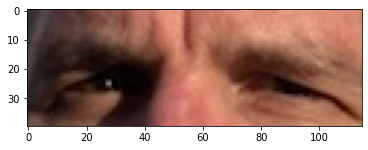

In [8]:
img= Image.open('../msds689/projects/kmeans/eyes.png')
X =np.array(img)
plt.imshow(X)

h,w,c= X.shape

print(X.shape)

X = X.reshape((-1,3))
X.shape

!!!!activate kmeans++!!!!


 97%|███████████████████████████ | 29/30 [00:00<00:00, 57.43it/s]

final norm:  0.5541158845613192
time: 0.5293691158294678


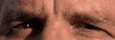

In [49]:
k=32
start = time()
centroids, labels = kmeans(X, k=k, centroids='kmeans++', max_iter=30)#,verbose=True)
print(f'time: {(time()-start)}')

centroids = centroids.astype(np.uint8)
X_32 = centroids[labels] # reassign all points

img_ = Image.fromarray(X_32.reshape(h,w,3))
img_

## full color img

(451, 600, 3)


(270600, 3)

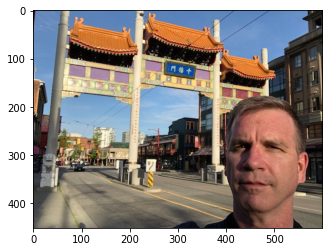

In [50]:
img= Image.open('../msds689/projects/kmeans/parrt-vancouver.jpg')
X =np.array(img)
plt.imshow(Image.fromarray(X))

h,w,c= X.shape

print(X.shape)

X = X.reshape((-1,3))
X.shape

!!!!activate kmeans++!!!!


 97%|███████████████████████████ | 29/30 [01:00<00:02,  2.08s/it]

final norm:  1.6077285101607415
time: 60.88148498535156


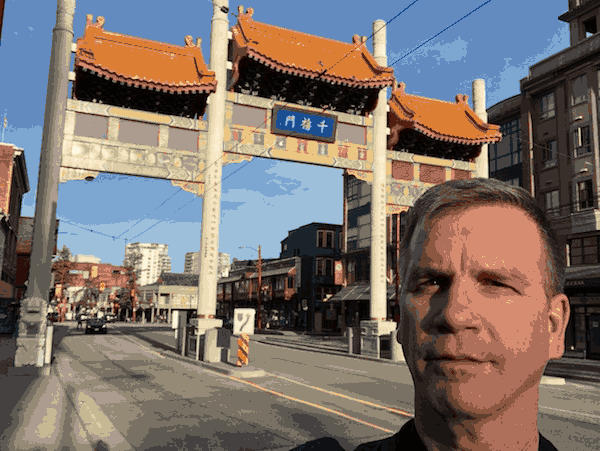

In [51]:
k=32
start = time()
centroids, labels = kmeans(X, k=k, centroids='kmeans++', max_iter=30)
print(f'time: {(time()-start)}')

centroids = centroids.astype(np.uint8)
X = centroids[labels] # reassign all points

img_ = Image.fromarray(X.reshape(h,w,3))
img_

# Advanced: using RFs to compute similarity matrices

https://www.stat.berkeley.edu/~breiman/RandomForests/cc_home.htm#prox

In [5]:
def leaf_samples(rf, X:np.ndarray):
    """
    Return a list of arrays where each array is the set of X sample indexes
    residing in a single leaf of some tree in rf forest. For example, if there
    are 4 leaves (in one or multiple trees), we might return:

        array([array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
               array([10, 11, 12, 13, 14, 15]), array([16, 17, 18, 19, 20]),
               array([21, 22, 23, 24, 25, 26, 27, 28, 29]))
    """
    n_trees = len(rf.estimators_)
    leaf_samples = []
    leaf_ids = rf.apply(X)  # which leaf does each X_i go to for sole tree?
    for t in range(n_trees):
        # Group by id and return sample indexes
        uniq_ids = np.unique(leaf_ids[:,t])
        sample_idxs_in_leaves = [np.where(leaf_ids[:, t] == id)[0] for id in uniq_ids]
        leaf_samples.extend(sample_idxs_in_leaves)
    return leaf_samples

In [37]:
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
sc = StandardScaler()
X = sc.fit_transform(X)
k = 2
X.shape

(569, 30)

In [38]:
rf = RandomForestClassifier()
rf.fit(X,y) 
leaves ,ntrees= leaf_samples(rf,X)
print(len(leaves))
nt = pd.DataFrame(leaves).T
nt

2111


,0,1,2,3,4,5,6,7,8,9,...,2101,2102,2103,2104,2105,2106,2107,2108,2109,2110
0,149.0,241.0,40.0,20.0,91.0,318.0,112.0,135.0,19.0,41.0,...,41.0,68.0,3.0,43.0,465.0,89.0,413.0,13.0,7.0,0.0
1,192.0,403.0,184.0,21.0,NaN,NaN,194.0,185.0,48.0,59.0,...,151.0,152.0,5.0,73.0,NaN,99.0,541.0,414.0,8.0,1.0
2,298.0,472.0,186.0,37.0,NaN,NaN,283.0,410.0,170.0,61.0,...,193.0,318.0,9.0,105.0,NaN,112.0,542.0,NaN,14.0,2.0
3,308.0,477.0,263.0,46.0,NaN,NaN,NaN,NaN,200.0,66.0,...,440.0,376.0,146.0,171.0,NaN,133.0,NaN,NaN,36.0,4.0
4,483.0,NaN,489.0,49.0,NaN,NaN,NaN,NaN,325.0,80.0,...,NaN,485.0,229.0,255.0,NaN,147.0,NaN,NaN,39.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
319,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
321,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [314]:
# {510, 561, 136, 397, 270, 398, 144, 404, 149, 278, 405, 407, 412, 159, 287, 418, 548, 37, 165, 296, 552, 554, 428, 173, 429, 304, 560, 50, 51, 178, 179, 308, 183, 309, 434, 438, 187, 315, 442, 319, 67, 326, 327, 455, 334, 463, 464, 209, 211, 346, 347, 92, 220, 476, 224, 97, 480, 355, 481, 357, 486, 359, 360, 490, 235, 238, 495, 241, 497, 116, 246, 377, 382}.intersection({192, 483, 263, 298, 241, 403, 308, 149, 472, 477})


In [315]:
### same record can appear in multiple trees (sampling with replacement)
# test_dup = [set(i) for i in trees]
# for i in test_dup[:5]:
#     test_dup.remove(i)
#     for ii in test_dup:
#         if i != ii and i.intersection(ii):
#             print(i,'\n')
#             print(ii)
#             print('='*30)

In [316]:
# t3 = trees[3]
# t3.shape
# t3

In [317]:
# for i in t3:
#     ept_matrix[i,t3]=1
# np.where(ept_matrix==1)

In [34]:
rf.n_estimators

100

In [43]:
#ept_matrix[t1,t1]=1
ept_matrix = np.zeros((X.shape[0],X.shape[0]))
for l in leaves:
    for i in l:
        # every time same pair of records appear in different trees add 1
        ept_matrix[i,l]+=1
normalized = ept_matrix/ntrees

In [44]:
print(ept_matrix.shape)

(569, 569)


In [320]:
# X, _ = make_circles(n_samples=500, noise=0.1, factor=.2)
# ept_matrix = np.zeros((X.shape[0],X.shape[0]))
# print(ept_matrix.shape)
# rf = RandomForestClassifier()
# rf.fit(X,_)
# leaves = leaf_samples(rf,X)
# print(rf.n_estimators)
# for l in leaves:
#     #print(ept_matrix)
#     for i in l:
#         # every time same pair of records appear in different trees add 1
#         ept_matrix[i,l]+=1
# normalized = ept_matrix/rf.n_estimators

In [45]:
pd.DataFrame(ept_matrix)

,0,1,2,3,4,5,6,7,8,9,...,559,560,561,562,563,564,565,566,567,568
0,100.0,58.0,79.0,8.0,90.0,13.0,75.0,34.0,14.0,12.0,...,0.0,0.0,0.0,63.0,78.0,73.0,74.0,57.0,79.0,0.0
1,58.0,100.0,76.0,6.0,62.0,10.0,80.0,34.0,10.0,7.0,...,0.0,1.0,0.0,59.0,75.0,74.0,79.0,66.0,76.0,0.0
2,79.0,76.0,100.0,11.0,78.0,21.0,96.0,48.0,22.0,16.0,...,0.0,0.0,0.0,81.0,99.0,91.0,95.0,74.0,100.0,0.0
3,8.0,6.0,11.0,100.0,6.0,52.0,9.0,20.0,56.0,69.0,...,0.0,0.0,0.0,12.0,10.0,7.0,9.0,4.0,11.0,0.0
4,90.0,62.0,78.0,6.0,100.0,11.0,79.0,32.0,12.0,10.0,...,0.0,0.0,0.0,61.0,77.0,82.0,81.0,61.0,78.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,73.0,74.0,91.0,7.0,82.0,15.0,92.0,41.0,15.0,11.0,...,0.0,0.0,0.0,72.0,92.0,100.0,94.0,75.0,91.0,0.0
565,74.0,79.0,95.0,9.0,81.0,18.0,96.0,45.0,18.0,14.0,...,0.0,0.0,0.0,76.0,94.0,94.0,100.0,74.0,95.0,0.0
566,57.0,66.0,74.0,4.0,61.0,7.0,74.0,31.0,6.0,3.0,...,0.0,0.0,0.0,56.0,74.0,75.0,74.0,100.0,74.0,0.0
567,79.0,76.0,100.0,11.0,78.0,21.0,96.0,48.0,22.0,16.0,...,0.0,0.0,0.0,81.0,99.0,91.0,95.0,74.0,100.0,0.0


In [46]:
pd.DataFrame(normalized)

,0,1,2,3,4,5,6,7,8,9,...,559,560,561,562,563,564,565,566,567,568
0,1.00,0.58,0.79,0.08,0.90,0.13,0.75,0.34,0.14,0.12,...,0.00,0.00,0.00,0.63,0.78,0.73,0.74,0.57,0.79,0.0
1,0.58,1.00,0.76,0.06,0.62,0.10,0.80,0.34,0.10,0.07,...,0.00,0.01,0.00,0.59,0.75,0.74,0.79,0.66,0.76,0.0
2,0.79,0.76,1.00,0.11,0.78,0.21,0.96,0.48,0.22,0.16,...,0.00,0.00,0.00,0.81,0.99,0.91,0.95,0.74,1.00,0.0
3,0.08,0.06,0.11,1.00,0.06,0.52,0.09,0.20,0.56,0.69,...,0.00,0.00,0.00,0.12,0.10,0.07,0.09,0.04,0.11,0.0
4,0.90,0.62,0.78,0.06,1.00,0.11,0.79,0.32,0.12,0.10,...,0.00,0.00,0.00,0.61,0.77,0.82,0.81,0.61,0.78,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.73,0.74,0.91,0.07,0.82,0.15,0.92,0.41,0.15,0.11,...,0.00,0.00,0.00,0.72,0.92,1.00,0.94,0.75,0.91,0.0
565,0.74,0.79,0.95,0.09,0.81,0.18,0.96,0.45,0.18,0.14,...,0.00,0.00,0.00,0.76,0.94,0.94,1.00,0.74,0.95,0.0
566,0.57,0.66,0.74,0.04,0.61,0.07,0.74,0.31,0.06,0.03,...,0.00,0.00,0.00,0.56,0.74,0.75,0.74,1.00,0.74,0.0
567,0.79,0.76,1.00,0.11,0.78,0.21,0.96,0.48,0.22,0.16,...,0.00,0.00,0.00,0.81,0.99,0.91,0.95,0.74,1.00,0.0


In [60]:
S = similarity_matrix(X) # breiman's trick
cluster = SpectralClustering(n_clusters=2, affinity='precomputed')
l = cluster.fit_predict(normalized)

In [61]:
clusters= []
for j in range(2):
    clusters.append(X[np.array(l) ==j])

clustering accur: 0.9753954305799648


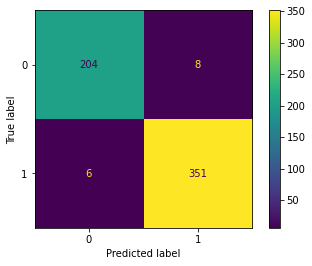

In [63]:
likely_confusion_matrix(y,l)

## circle

[0 1 0 1 0 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1
 0 0 0 1 0 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 1 1 1 1 1 0 0 0 1 1 0 0 0 0 1 0 1
 1 1 0 0 1 1 1 0 1 1 0 1 0 1 1 1 1 0 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 0
 1 0 1 1 1 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0
 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 1 1 0 1 1 1 1 1
 1 1 0 1 1 0 1 1 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 1 0
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 1 0 1 0 0 1 1 1 0 0
 1 1 0 1 1 0 0 1 0 1 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1
 0 1 0 1 1 1 1 1 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0
 1 1 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1 0 1 0
 1 1 0 1 0 1 1 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 1
 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 0
 1 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1 1 1 1 1 1 0 1 0 1 0 1 0 0 1 0
 1 0 0 1 0 1 1 1 1 1 1 0 

/Users/fanli/opt/anaconda3/envs/adv630/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


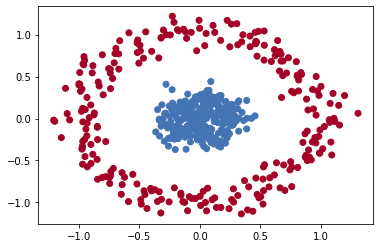

In [67]:
X, _ = make_circles(n_samples=500, noise=0.1, factor=.2)

cluster = SpectralClustering(n_clusters=2, affinity="nearest_neighbors")
labels = cluster.fit_predict(X)  # pass X not similarity matrix

print(labels)
colors=np.array(['#4574B4','#A40227'])
plt.scatter(X[:,0], X[:,1], c=colors[labels])
#plt.savefig("/Users/parrt/Desktop/nested-spectral.png", dpi=200)
plt.show()

In [68]:
rf = RandomForestClassifier()
rf.fit(X,_) 
trees = leaf_samples(rf,X)
print(len(trees))
nt = pd.DataFrame(trees).T
#nt

1377


In [69]:
ept_matrix = np.zeros((X.shape[0],X.shape[0]))
ept_matrix.shape

(500, 500)

In [70]:
#ept_matrix[t1,t1]=1
for t in trees:
    for i in t:
        ept_matrix[i,t]=1
normalized = ept_matrix/len(trees)

In [71]:
#S = similarity_matrix(X) # breiman's trick
cluster = SpectralClustering(n_clusters=2, affinity='precomputed')
l = cluster.fit_predict(normalized)

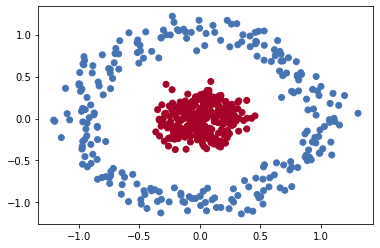

In [73]:
colors=np.array(['#4574B4','#A40227'])
plt.scatter(X[:,0], X[:,1], c=colors[l])
#plt.savefig("/Users/parrt/Desktop/nested-spectral.png", dpi=200)
plt.show()

## modualize

In [47]:
def leaf_samples(rf, X:np.ndarray):
    """
    Return a list of arrays where each array is the set of X sample indexes
    residing in a single leaf of some tree in rf forest. For example, if there
    are 4 leaves (in one or multiple trees), we might return:

        array([array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
               array([10, 11, 12, 13, 14, 15]), array([16, 17, 18, 19, 20]),
               array([21, 22, 23, 24, 25, 26, 27, 28, 29]))
    """
    n_trees = len(rf.estimators_)
    leaf_samples = []
    leaf_ids = rf.apply(X)  # which leaf does each X_i go to for sole tree?
    for t in range(n_trees):
        # Group by id and return sample indexes
        uniq_ids = np.unique(leaf_ids[:,t])
        sample_idxs_in_leaves = [np.where(leaf_ids[:, t] == id)[0] for id in uniq_ids]
        leaf_samples.extend(sample_idxs_in_leaves)
     # need to return n_trees
    return leaf_samples,n_trees

In [69]:
def similarity_matrix(X,rf):
    leaves,n_trees= leaf_samples(rf,X)
    #nt = pd.DataFrame(trees).T
    ept_matrix = np.zeros((X.shape[0],X.shape[0]))
    for leaf in leaves:
        for row_index in leaf:
            # every time same pair of records appear in different trees add 1
            ept_matrix[row_index,leaf]+=1
    return ept_matrix#/n_trees

### test cancer

In [70]:
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
sc = StandardScaler()
X = sc.fit_transform(X)
k = 2
X.shape
rf = RandomForestClassifier()
rf.fit(X,y) 

RandomForestClassifier()

In [73]:
S = similarity_matrix(X,rf) # breiman's trick
cluster = SpectralClustering(n_clusters=2, affinity='precomputed')
label = cluster.fit_predict(S) # pass similarity matrix not X
label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [72]:
pd.DataFrame(S)

,0,1,2,3,4,5,6,7,8,9,...,559,560,561,562,563,564,565,566,567,568
0,100.0,63.0,68.0,10.0,93.0,11.0,66.0,38.0,11.0,11.0,...,0.0,0.0,0.0,45.0,67.0,66.0,67.0,53.0,68.0,0.0
1,63.0,100.0,85.0,7.0,66.0,12.0,83.0,49.0,12.0,9.0,...,0.0,0.0,0.0,58.0,84.0,82.0,84.0,71.0,84.0,0.0
2,68.0,85.0,100.0,11.0,73.0,19.0,97.0,59.0,20.0,12.0,...,0.0,0.0,0.0,70.0,97.0,96.0,99.0,78.0,98.0,0.0
3,10.0,7.0,11.0,100.0,8.0,54.0,10.0,20.0,55.0,73.0,...,0.0,0.0,0.0,15.0,13.0,12.0,12.0,5.0,13.0,0.0
4,93.0,66.0,73.0,8.0,100.0,15.0,71.0,40.0,16.0,9.0,...,0.0,0.0,0.0,48.0,70.0,71.0,72.0,56.0,71.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,66.0,82.0,96.0,12.0,71.0,18.0,94.0,59.0,20.0,12.0,...,0.0,0.0,0.0,68.0,97.0,100.0,97.0,79.0,96.0,0.0
565,67.0,84.0,99.0,12.0,72.0,19.0,97.0,60.0,21.0,13.0,...,0.0,0.0,0.0,71.0,98.0,97.0,100.0,79.0,99.0,0.0
566,53.0,71.0,78.0,5.0,56.0,6.0,76.0,46.0,8.0,5.0,...,0.0,0.0,0.0,53.0,79.0,79.0,79.0,100.0,79.0,0.0
567,68.0,84.0,98.0,13.0,71.0,18.0,96.0,59.0,20.0,14.0,...,0.0,0.0,0.0,72.0,99.0,96.0,99.0,79.0,100.0,0.0


clustering accur: 0.9420035149384886


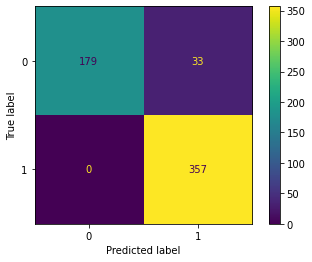

In [25]:
clusters= []
for j in range(2):
    clusters.append(X[np.array(label) ==j])
    
likely_confusion_matrix(y,label)

### test circle

[0 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 0 0 0 1 0 1 1 1 0 1 1 1 0 0 0 0 0 0 0 1 0
 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1
 1 0 1 0 1 1 0 1 0 0 1 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0 0 1 1 1 1 0
 0 1 1 1 1 0 1 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0
 1 1 1 0 1 0 0 1 0 1 0 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0
 0 0 1 1 0 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0
 0 0 0 1 1 1 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 1 1 0 1 1 0 0 0 1 1 1 0 1 0 0 1
 1 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0
 1 1 0 1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 1 0 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 0 0
 0 1 1 0 1 0 0 1 0 1 0 1 1 1 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 1 1 0
 0 1 0 1 1 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 0 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1
 1 1 1 0 1 0 0 1 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 1 0 1 0 1 0 1 1 1
 0 0 1 1 1 0 0 0 0 1 1 0 

/Users/fanli/opt/anaconda3/envs/adv630/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


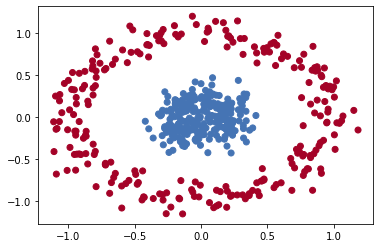

In [86]:
# circle
X, y = make_circles(n_samples=500, noise=0.1, factor=.2)

cluster = SpectralClustering(n_clusters=2, affinity="nearest_neighbors")
labels = cluster.fit_predict(X)  # pass X not similarity matrix

print(labels)
colors=np.array(['#4574B4','#A40227'])
plt.scatter(X[:,0], X[:,1], c=colors[labels])
#plt.savefig("/Users/parrt/Desktop/nested-spectral.png", dpi=200)
plt.show()

[0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 1 0 0 0 1 0 1 1 1 0 1 1 1 0 0 0 0 0 0 0 1 0
 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1
 1 0 1 0 1 1 0 1 0 0 1 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0 0 1 1 1 1 0
 0 1 1 1 1 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0
 1 1 1 0 1 0 0 1 0 1 0 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0
 0 0 1 1 0 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0
 0 0 0 1 1 1 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 1 1 0 1 1 0 0 0 1 1 1 0 1 0 0 1
 1 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0
 1 1 0 1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 1 0 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 0 0
 0 1 1 0 1 0 0 1 0 1 0 1 1 1 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 1 1 0
 0 1 0 1 1 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 0 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1
 1 1 1 0 1 0 0 1 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 1 0 1 0 1 0 1 1 1
 0 0 1 1 1 0 0 0 0 1 1 0 

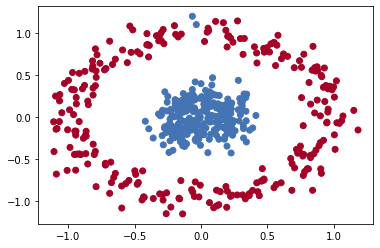

In [90]:
#X, y = make_circles(n_samples=500, noise=0.1, factor=.2)

rf = RandomForestClassifier()
rf.fit(X,y) 
S = similarity_matrix(X,rf) # breiman's trick
cluster = SpectralClustering(n_clusters=2, affinity='precomputed')
label = cluster.fit_predict(S) # pass similarity matrix not X
print(label)
colors=np.array(['#4574B4','#A40227'])
plt.scatter(X[:,0], X[:,1], c=colors[label])
#plt.savefig("/Users/parrt/Desktop/nested-spectral.png", dpi=200)
plt.show()